<a href="https://colab.research.google.com/github/Chamodya-ka/StreetScapeVisualFeatures/blob/main/RFC_ADE_percentages_8_features_summaried.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from matplotlib import pyplot as plt
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.model_selection import train_test_split

In [137]:
classes_quality= ['Low','Moderate','High']

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
df=pd.read_csv('/content/drive/MyDrive/Public/Streetscape_needs/percentages_with_colors.csv')
df

,index,wall,building;edifice,sky,floor;flooring,tree,ceiling,road;route,bed,windowpane;window,...,clock,flag,target,file_name,R,G,B,C,M,Y
0,0,0.000000,0.608337,0.165222,0.0,0.000000,0.0,0.134583,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/8 (2).JPG,1.109158,1.225242,1.208492,1.890842,1.774758,1.791508
1,1,0.000000,0.500000,0.268127,0.0,0.000000,0.0,0.150452,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/9 (2).JPG,0.879383,1.420917,1.293267,2.120617,1.579083,1.706733
2,2,0.000000,0.555481,0.183716,0.0,0.000793,0.0,0.121826,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/10.JPG,1.142817,1.292750,1.263942,1.857183,1.707250,1.736058
3,3,0.000000,0.582825,0.196899,0.0,0.000916,0.0,0.128906,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/11 (2).JPG,1.083163,1.273529,1.193137,1.916837,1.726471,1.806863
4,4,0.000000,0.587830,0.179443,0.0,0.000000,0.0,0.144409,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/12 (2).JPG,1.116571,1.167079,1.099329,1.883429,1.832921,1.900671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1332,0.093689,0.119141,0.038818,0.0,0.423828,0.0,0.255249,0.0,0.0,...,0.0,0.0,2,"2.High Quality_L/79.869716607977,6.88184346697...",1.236558,1.685892,1.144550,1.763442,1.314108,1.855450
1333,1333,0.000000,0.244690,0.226624,0.0,0.039429,0.0,0.405945,0.0,0.0,...,0.0,0.0,2,"2.High Quality_L/79.869716607977,6.88184346697...",0.888050,1.417308,1.208192,2.111950,1.582692,1.791808
1334,1334,0.000000,0.361816,0.141418,0.0,0.005371,0.0,0.254272,0.0,0.0,...,0.0,0.0,2,"2.High Quality_L/79.851748057395,6.90500121459...",1.073146,1.249138,1.274721,1.926854,1.750862,1.725279
1335,1335,0.000000,0.444397,0.066467,0.0,0.015991,0.0,0.374084,0.0,0.0,...,0.0,0.0,2,"2.High Quality_L/79.851748057395,6.90500121459...",1.041746,1.281971,1.081604,1.958254,1.718029,1.918396


In [140]:

import csv

CLASSES = []

PALLETTE = []
first = True
with open('/content/drive/MyDrive/Public/Streetscape_needs/ade_labels.csv', newline='') as csvfile:
  csvFile = csv.reader(csvfile)
  for lines in csvFile:
    print(lines)
    CLASSES.append(lines[-1])
    PALLETTE.append(list(map(int, lines[0][1:-1].split(','))))

from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b2-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b2-finetuned-ade-512-512")


['(120, 120, 120)', 'wall']
['(180, 120, 120)', 'building;edifice']
['(6, 230, 230)', 'sky']
['(80, 50, 50)', 'floor;flooring']
['(4, 200, 3)', 'tree']
['(120, 120, 80)', 'ceiling']
['(140, 140, 140)', 'road;route']
['(204, 5, 255)', 'bed']
['(230, 230, 230)', 'windowpane;window']
['(4, 250, 7)', 'grass']
['(224, 5, 255)', 'cabinet']
['(235, 255, 7)', 'sidewalk;pavement']
['(150, 5, 61)', 'person;individual;someone;somebody;mortal;soul']
['(120, 120, 70)', 'earth;ground']
['(8, 255, 51)', 'door;double;door']
['(255, 6, 82)', 'table']
['(143, 255, 140)', 'mountain;mount']
['(204, 255, 4)', 'plant;flora;plant;life']
['(255, 51, 7)', 'curtain;drape;drapery;mantle;pall']
['(204, 70, 3)', 'chair']
['(0, 102, 200)', 'car;auto;automobile;machine;motorcar']
['(61, 230, 250)', 'water']
['(255, 6, 51)', 'painting;picture']
['(11, 102, 255)', 'sofa;couch;lounge']
['(255, 7, 71)', 'shelf']
['(255, 9, 224)', 'house']
['(9, 7, 230)', 'sea']
['(220, 220, 220)', 'mirror']
['(255, 9, 92)', 'rug;carpet;

The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'


In [141]:
#new_header = df.iloc[0] #grab the first row for the header
#df = df[1:] #take the data less the header row
#df.columns = new_header #set the header row as the df header

In [142]:
df.pop('index')

,index
0,0
1,1
2,2
3,3
4,4
...,...
1332,1332
1333,1333
1334,1334
1335,1335


In [143]:
df.head()

,wall,building;edifice,sky,floor;flooring,tree,ceiling,road;route,bed,windowpane;window,grass,...,clock,flag,target,file_name,R,G,B,C,M,Y
0,0.0,0.608337,0.165222,0.0,0.000000,0.0,0.134583,0.0,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/8 (2).JPG,1.109158,1.225242,1.208492,1.890842,1.774758,1.791508
1,0.0,0.500000,0.268127,0.0,0.000000,0.0,0.150452,0.0,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/9 (2).JPG,0.879383,1.420917,1.293267,2.120617,1.579083,1.706733
2,0.0,0.555481,0.183716,0.0,0.000793,0.0,0.121826,0.0,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/10.JPG,1.142817,1.292750,1.263942,1.857183,1.707250,1.736058
3,0.0,0.582825,0.196899,0.0,0.000916,0.0,0.128906,0.0,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/11 (2).JPG,1.083163,1.273529,1.193137,1.916837,1.726471,1.806863
4,0.0,0.587830,0.179443,0.0,0.000000,0.0,0.144409,0.0,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/12 (2).JPG,1.116571,1.167079,1.099329,1.883429,1.832921,1.900671


In [144]:
# dummies = pd.get_dummies(df)

In [145]:
# corr = dummies.corr()

In [146]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [147]:
# RUN CORRELATION

# Set up the matplotlib plot configuration
#
# f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
# mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
# sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


In [148]:
file_names = df.pop("file_name")
data=df.drop('target', axis=1)
target=df['target']

In [149]:
#dropping irrelavant features
required_cols = ['wall','building;edifice','sky','tree','road;route','grass','sidewalk;pavement','plant;flora;plant;life',
                 'water','house','sea','field','railing;rail','column;pillar','signboard;sign','sand','skyscraper','path',
                 'flower','bench','light;light;source','tower','streetlight;street;lamp','dirt;track','pole',
                 'poster;posting;placard;notice;bill;card','fountain','lake','sculpture','traffic;light;traffic;signal;stoplight',
                 'bulletin;board;notice;board','R','G','B','C','M','Y']
data=data[required_cols]



In [150]:
len(required_cols)

37

In [151]:
data.head()

,wall,building;edifice,sky,tree,road;route,grass,sidewalk;pavement,plant;flora;plant;life,water,house,...,lake,sculpture,traffic;light;traffic;signal;stoplight,bulletin;board;notice;board,R,G,B,C,M,Y
0,0.0,0.608337,0.165222,0.000000,0.134583,0.0,0.036987,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.109158,1.225242,1.208492,1.890842,1.774758,1.791508
1,0.0,0.500000,0.268127,0.000000,0.150452,0.0,0.031128,0.002075,0.0,0.0,...,0.0,0.0,0.0,0.0,0.879383,1.420917,1.293267,2.120617,1.579083,1.706733
2,0.0,0.555481,0.183716,0.000793,0.121826,0.0,0.026428,0.001099,0.0,0.0,...,0.0,0.0,0.0,0.0,1.142817,1.292750,1.263942,1.857183,1.707250,1.736058
3,0.0,0.582825,0.196899,0.000916,0.128906,0.0,0.006470,0.046753,0.0,0.0,...,0.0,0.0,0.0,0.0,1.083163,1.273529,1.193137,1.916837,1.726471,1.806863
4,0.0,0.587830,0.179443,0.000000,0.144409,0.0,0.058167,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.116571,1.167079,1.099329,1.883429,1.832921,1.900671


In [152]:
for x in data.columns:
  print(x)

wall
building;edifice
sky
tree
road;route
grass
sidewalk;pavement
plant;flora;plant;life
water
house
sea
field
railing;rail
column;pillar
signboard;sign
sand
skyscraper
path
flower
bench
light;light;source
tower
streetlight;street;lamp
dirt;track
pole
poster;posting;placard;notice;bill;card
fountain
lake
sculpture
traffic;light;traffic;signal;stoplight
bulletin;board;notice;board
R
G
B
C
M
Y


In [153]:
modified_data = pd.DataFrame()

In [154]:
modified_data['SkyVisibility'] = data['sky']
modified_data['AvailabilityOfTrees'] = data['tree'] + data['grass'] + data['plant;flora;plant;life'] + data['flower']
modified_data['ProportionOfStreetWall'] = data['wall'] + data['building;edifice']
modified_data['AvailabilityOfBuildings'] = data['building;edifice'] + data['house'] + data['skyscraper'] + data['tower']
modified_data['AmountOfStreetFurniture'] = data['column;pillar'] + data['signboard;sign'] + data['railing;rail'] + data['bench'] + data['light;light;source'] + data['pole'] + data['traffic;light;traffic;signal;stoplight'] + data['bulletin;board;notice;board']
modified_data['AvailabilityOfSidewalk'] = data['sidewalk;pavement']
modified_data['AvailabilityOfSkyScrapers'] = data['skyscraper']


In [155]:

modified_data['ColorVariation'] = (((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['R'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['G'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['B'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['C'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['M'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['Y'])**2)**0.5

In [156]:
modified_data.head()

,SkyVisibility,AvailabilityOfTrees,ProportionOfStreetWall,AvailabilityOfBuildings,AmountOfStreetFurniture,AvailabilityOfSidewalk,AvailabilityOfSkyScrapers,ColorVariation
0,0.165222,0.000000,0.608337,0.608337,0.009583,0.036987,0.0,0.791488
1,0.268127,0.002075,0.500000,0.500000,0.029114,0.031128,0.0,0.931835
2,0.183716,0.001892,0.555481,0.555481,0.023682,0.026428,0.0,0.672690
3,0.196899,0.047668,0.582825,0.582825,0.011169,0.006470,0.0,0.799008
4,0.179443,0.000000,0.587830,0.587830,0.006836,0.058167,0.0,0.914758


In [157]:
X_train, X_test, y_train, y_test = train_test_split(modified_data, target, test_size=0.2, random_state=42,stratify=target,shuffle=True)

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [159]:
parameters = {'n_estimators':[10,50,100,250,375,450], 'max_depth': [2,3,4,10,11,None], 'max_features':('sqrt', 'log2', 8)}

In [160]:
rf = RandomForestClassifier()

In [161]:
RFC = GridSearchCV(rf, parameters)

In [162]:
#RFC.fit(X_train, y_train)

In [163]:
#print (RFC.best_params_)

In [164]:
#print(RFC.best_score_)

In [165]:
rf_best = RandomForestClassifier(max_features='log2', n_estimators= 500, max_depth=15)

In [166]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=500)

In [167]:
y_pred = rf_best.predict(X_test)

In [168]:
#y_test=y_test.astype(int)

In [169]:
y_pred_intrnal = rf_best.predict(X_train)
accuracy_int = accuracy_score(y_train, y_pred_intrnal)
print("Accuracy:", accuracy_int)

Accuracy: 0.9990645463049579


In [170]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6417910447761194


In [171]:
#st pipeline

In [172]:
import os
import cv2
from PIL import Image

In [175]:
# # get image REQUIRES AN API KEY
# row={'X':79.87735602,'Y':6.97978662,'angle':265.8099958}
# X,Y,heading = (row['X'], row['Y'], row['angle'])
# api_req = "https://maps.googleapis.com/maps/api/streetview?location="+str(Y)+','+str(X)+"&size=600x400&key=${key}&radius=40&fov=100&heading=" + str(heading)
# response = requests.get(api_req)

In [176]:
#import imageio
#response_img = imageio.imread(api_req)

In [177]:
# img = np.asarray(response_img)
# img_for_col_variation = img

In [178]:
# img_size = 128
# plt.imshow(img)

In [179]:
# # get color variation
# observed_colors = [(255,0,0),(0,255,0),(0,0,255),(0,255,255),(255,0,255),(255,255,0)] # R, G, B, C, M, Y
# nearest_to = 290
# colors_containers = np.ones(shape=[len(observed_colors),400,600,3])
# for i,color in enumerate(observed_colors):
#     colors_containers[i,:,:,:] = np.array(color)
# im = cv2.cvtColor(img_for_col_variation,cv2.COLOR_BGR2RGB)
# differences = np.sum(np.sqrt((colors_containers-im)**2),axis=3)
# indices_min = np.argmin(differences,axis=0)
# indices_min_flat = indices_min.reshape(-1)
# new_differences = differences.reshape((len(observed_colors),-1))
# new_image = []
# for i in range(indices_min.shape[0]*indices_min.shape[1]):
#   x = new_differences[:,i]
#   #print(x)
#   #print(x[indices_min_flat[c]])
#   if x[indices_min_flat[i]] < 290:
#     new_image.append(np.array(observed_colors[indices_min_flat[i]]))
#   else:
#     new_image.append(np.array((255,255,255)))
# new_image = np.array(new_image).reshape(im.shape)
# colors = []
# for color in observed_colors:
#   colors.append(np.count_nonzero(new_image==color)/(600*400.0))

In [180]:
# plt.imshow(new_image)

In [181]:
# # get tabular data from segmentated image
# image = response_img
# inputs = feature_extractor(images=image, return_tensors="pt")
# outputs = model(**inputs)
# logits = outputs.logits
# out = logits.argmax(dim=1)[0]
# percentages = [np.count_nonzero(out==i)/(img_size*img_size) for i in range(len(CLASSES))]
# data = pd.DataFrame([percentages+colors])

In [182]:
# data.shape

In [183]:
# clean .
# modified_data = pd.DataFrame()
# data.columns = CLASSES + ['R'] + ['G'] + ['B'] + ['C'] + ['M'] +  ['Y']
# modified_data['SkyVisibility'] = data['sky']
# modified_data['AvailabilityOfTrees'] = data['tree'] + data['grass'] + data['plant;flora;plant;life'] + data['flower']
# modified_data['ProportionOfStreetWall'] = data['wall'] + data['building;edifice']
# modified_data['AvailabilityOfBuildings'] = data['building;edifice'] + data['house'] + data['skyscraper'] + data['tower']
# modified_data['AmountOfStreetFurniture'] = data['column;pillar'] + data['signboard;sign'] + data['railing;rail'] + data['bench'] + data['light;light;source'] + data['pole'] + data['traffic;light;traffic;signal;stoplight'] + data['bulletin;board;notice;board']
# modified_data['AvailabilityOfSidewalk'] = data['sidewalk;pavement']
# modified_data['AvailabilityOfSkyScrapers'] = data['skyscraper']
# modified_data['ColorVariation'] = (((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['R'])**2 +
# ((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['G'])**2 +
# ((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['B'])**2 +
# ((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['C'])**2 +
# ((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['M'])**2 +
# ((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['Y'])**2)**0.5


In [184]:
#rf_best.predict(modified_data), rf_best.predict_proba(modified_data)[0][rf_best.predict(modified_data)[0]], classes_quality[rf_best.predict(modified_data)[0]]

In [185]:
# save RFC
import joblib

In [186]:
joblib.dump(rf_best, "/content/drive/MyDrive/Public/Streetscape_needs/RFC_B1.joblib")

['/content/drive/MyDrive/Public/Streetscape_needs/RFC_B1.joblib']

In [187]:
#end pipeline

In [188]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro",labels = [0,1,2])
recall = recall_score(y_test, y_pred,average="macro", labels = [0,1,2])
f1 = f1_score(y_test, y_pred,average="macro", labels = [0,1,2])


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.6417910447761194
Precision: 0.6454350605195159
Recall: 0.6289281705948372
F1-Score: 0.6336225539291438


In [189]:
!pip install shap==0.44.0

In [190]:

import shap

In [191]:
X_test.shape , y_test.shape

((268, 8), (268,))

In [192]:
y_test_ = y_test.astype(float)

In [193]:
X_test[:40]

,SkyVisibility,AvailabilityOfTrees,ProportionOfStreetWall,AvailabilityOfBuildings,AmountOfStreetFurniture,AvailabilityOfSidewalk,AvailabilityOfSkyScrapers,ColorVariation
529,0.146423,0.574402,0.020264,0.020264,0.007629,0.018677,0.0,0.816378
878,0.310120,0.001465,0.226501,0.226501,0.011597,0.029907,0.0,1.144953
532,0.403442,0.324646,0.016174,0.012695,0.003357,0.030640,0.0,1.011090
820,0.052124,0.127869,0.420593,0.420593,0.001831,0.098083,0.0,1.337358
889,0.416016,0.098083,0.036987,0.009888,0.000732,0.000671,0.0,1.133465
205,0.294128,0.033264,0.223999,0.193420,0.001221,0.023499,0.0,0.999379
1070,0.372803,0.282043,0.049316,0.049255,0.000000,0.002930,0.0,1.057285
426,0.183838,0.065125,0.389099,0.389099,0.002808,0.000000,0.0,0.812252
1044,0.274719,0.343994,0.048401,0.005493,0.045105,0.013916,0.0,1.002344
483,0.141907,0.247864,0.237366,0.186035,0.010681,0.026489,0.0,0.855104


In [194]:
import joblib
rf_best = joblib.load("/content/drive/MyDrive/Public/Streetscape_needs/RFC.joblib")

In [195]:
background = X_test.astype(float)



In [196]:
e = shap.TreeExplainer(rf_best, data=background, feature_perturbation='interventional', model_output='raw',feature_names=df.columns, output_names=['Low','Med','High'])
#shap_values = e(modified_data_eval)

In [197]:
X_test.shape

(268, 8)

In [198]:
# evaluate selected images
eval_df=pd.read_csv('/content/drive/MyDrive/Public/Streetscape_needs/percentages_with_colors-2.csv')

#shap_values = e.shap_values(test_images) #check_additivity=False
#shap_values = e(test_images)

In [199]:
#new_header = eval_df.iloc[0] #grab the first row for the header
#eval_df = eval_df[1:] #take the data less the header row
#eval_df.columns = new_header #set the header row as the df header

In [200]:
eval_df.head()

,index,wall,building;edifice,sky,floor;flooring,tree,ceiling,road;route,bed,windowpane;window,...,clock,flag,target,file_name,R,G,B,C,M,Y
0,1,0.043518,0.319275,0.251892,0.0,0.020142,0.0,0.242249,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/WhatsApp Image 2024-02-06 at 2...,0.934892,1.331242,1.180700,2.065108,1.668758,1.819300
1,2,0.039062,0.231750,0.248779,0.0,0.022888,0.0,0.285156,0.0,0.0,...,0.0,0.0,0,0.Low Quality_L/WhatsApp Image 2024-02-06 at 2...,0.939604,1.368262,1.279721,2.060396,1.631738,1.720279
2,3,0.027588,0.161133,0.214050,0.0,0.130920,0.0,0.292114,0.0,0.0,...,0.0,0.0,1,1.Moderate Quality_L/WhatsApp Image 2024-02-06...,1.052717,1.287725,1.079775,1.947283,1.712275,1.920225
3,4,0.000000,0.082275,0.218323,0.0,0.272278,0.0,0.400635,0.0,0.0,...,0.0,0.0,1,1.Moderate Quality_L/WhatsApp Image 2024-02-06...,0.949908,1.428700,1.214892,2.050092,1.571300,1.785108
4,5,0.260254,0.071411,0.003174,0.0,0.341248,0.0,0.003418,0.0,0.0,...,0.0,0.0,2,2.High Quality_L/WhatsApp Image 2024-02-06 at ...,1.315692,1.362425,0.978342,1.684308,1.637575,2.021658


In [201]:
file_names = eval_df.pop("file_name")
data=eval_df.drop('target', axis=1)
target=eval_df['target']
eval_df.head()

,index,wall,building;edifice,sky,floor;flooring,tree,ceiling,road;route,bed,windowpane;window,...,glass;drinking;glass,clock,flag,target,R,G,B,C,M,Y
0,1,0.043518,0.319275,0.251892,0.0,0.020142,0.0,0.242249,0.0,0.0,...,0.0,0.0,0.0,0,0.934892,1.331242,1.180700,2.065108,1.668758,1.819300
1,2,0.039062,0.231750,0.248779,0.0,0.022888,0.0,0.285156,0.0,0.0,...,0.0,0.0,0.0,0,0.939604,1.368262,1.279721,2.060396,1.631738,1.720279
2,3,0.027588,0.161133,0.214050,0.0,0.130920,0.0,0.292114,0.0,0.0,...,0.0,0.0,0.0,1,1.052717,1.287725,1.079775,1.947283,1.712275,1.920225
3,4,0.000000,0.082275,0.218323,0.0,0.272278,0.0,0.400635,0.0,0.0,...,0.0,0.0,0.0,1,0.949908,1.428700,1.214892,2.050092,1.571300,1.785108
4,5,0.260254,0.071411,0.003174,0.0,0.341248,0.0,0.003418,0.0,0.0,...,0.0,0.0,0.0,2,1.315692,1.362425,0.978342,1.684308,1.637575,2.021658


In [202]:
eval_df

,index,wall,building;edifice,sky,floor;flooring,tree,ceiling,road;route,bed,windowpane;window,...,glass;drinking;glass,clock,flag,target,R,G,B,C,M,Y
0,1,0.043518,0.319275,0.251892,0.0,0.020142,0.0,0.242249,0.0,0.0,...,0.0,0.0,0.0,0,0.934892,1.331242,1.180700,2.065108,1.668758,1.819300
1,2,0.039062,0.231750,0.248779,0.0,0.022888,0.0,0.285156,0.0,0.0,...,0.0,0.0,0.0,0,0.939604,1.368262,1.279721,2.060396,1.631738,1.720279
2,3,0.027588,0.161133,0.214050,0.0,0.130920,0.0,0.292114,0.0,0.0,...,0.0,0.0,0.0,1,1.052717,1.287725,1.079775,1.947283,1.712275,1.920225
3,4,0.000000,0.082275,0.218323,0.0,0.272278,0.0,0.400635,0.0,0.0,...,0.0,0.0,0.0,1,0.949908,1.428700,1.214892,2.050092,1.571300,1.785108
4,5,0.260254,0.071411,0.003174,0.0,0.341248,0.0,0.003418,0.0,0.0,...,0.0,0.0,0.0,2,1.315692,1.362425,0.978342,1.684308,1.637575,2.021658
5,6,0.006226,0.194885,0.282471,0.0,0.001221,0.0,0.386780,0.0,0.0,...,0.0,0.0,0.0,2,0.908325,1.275800,1.194583,2.091675,1.724200,1.805417


In [203]:
in_eval_data = eval_df[required_cols]

In [204]:
modified_data_eval = pd.DataFrame()
modified_data_eval['SkyVisibility'] = data['sky']
modified_data_eval['AvailabilityOfTrees'] = data['tree'] + data['grass'] + data['plant;flora;plant;life'] + data['flower']
modified_data_eval['ProportionOfStreetWall'] = data['wall'] + data['building;edifice']
modified_data_eval['AvailabilityOfBuildings'] = data['building;edifice'] + data['house'] + data['skyscraper'] + data['tower']
modified_data_eval['AmountOfStreetFurniture'] = data['column;pillar'] + data['signboard;sign'] + data['railing;rail'] + data['bench'] + data['light;light;source'] + data['pole'] + data['traffic;light;traffic;signal;stoplight'] + data['bulletin;board;notice;board']
modified_data_eval['AvailabilityOfSidewalk'] = data['sidewalk;pavement']
modified_data_eval['AvailabilityOfSkyScrapers'] = data['skyscraper']
modified_data_eval['ColorVariation'] = (((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['R'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['G'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['B'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['C'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['M'])**2 +
((data['R'] + data['G'] + data['B'] + data['C'] + data['M'] + data['Y'])/6 - data['Y'])**2)**0.5


In [205]:
#val_input_data = modified_data_eval.values

In [206]:
shap_values = e(modified_data_eval)

In [207]:
[print(n) for n in file_names]

0.Low Quality_L/WhatsApp Image 2024-02-06 at 20.40.12 (4).jpeg
0.Low Quality_L/WhatsApp Image 2024-02-06 at 20.40.13.jpeg
1.Moderate Quality_L/WhatsApp Image 2024-02-06 at 20.40.12 (2).jpeg
1.Moderate Quality_L/WhatsApp Image 2024-02-06 at 20.40.12 (3).jpeg
2.High Quality_L/WhatsApp Image 2024-02-06 at 20.40.12.jpeg
2.High Quality_L/WhatsApp Image 2024-02-06 at 20.40.12 (1).jpeg


[None, None, None, None, None, None]

In [208]:
rf_best.predict(modified_data_eval)

array([0, 0, 2, 1, 1, 2])

In [209]:
rf_best.predict_proba(modified_data_eval)

array([[0.95      , 0.026     , 0.024     ],
       [0.75577352, 0.17935506, 0.06487142],
       [0.09557199, 0.42777628, 0.47665173],
       [0.04265362, 0.60215801, 0.35518837],
       [0.34511111, 0.40409524, 0.25079365],
       [0.12751515, 0.1934697 , 0.67901515]])

In [210]:
shap_values.shape

(6, 8, 3)

In [211]:
np.argmax(rf_best.predict_proba(modified_data_eval)[5])

2

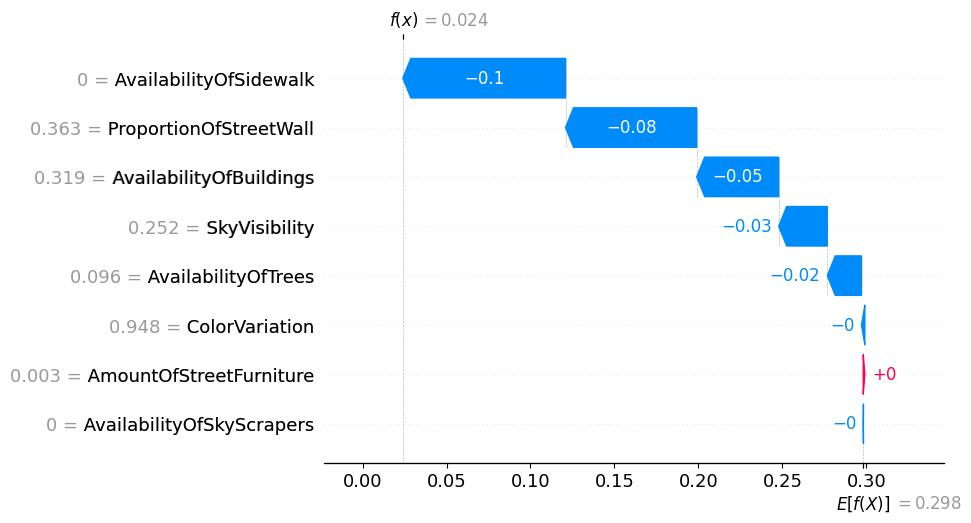

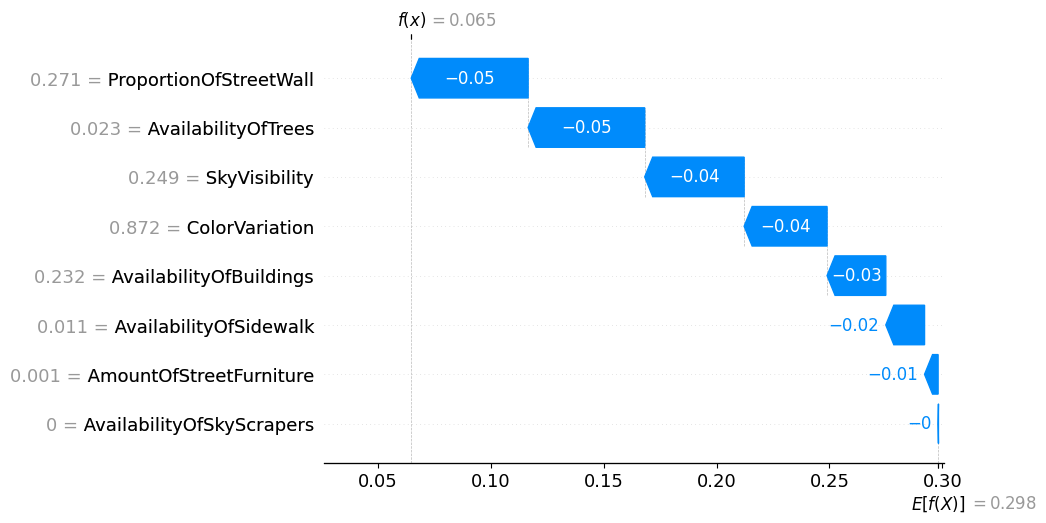

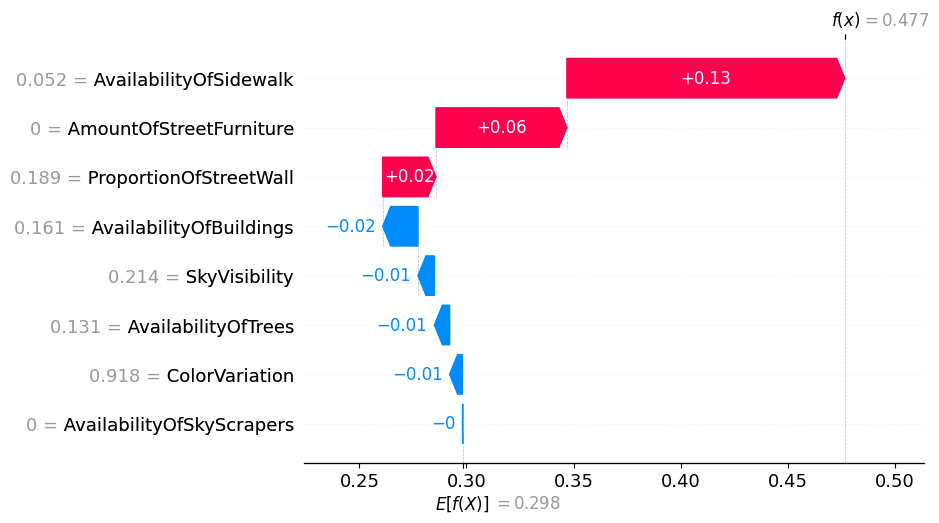

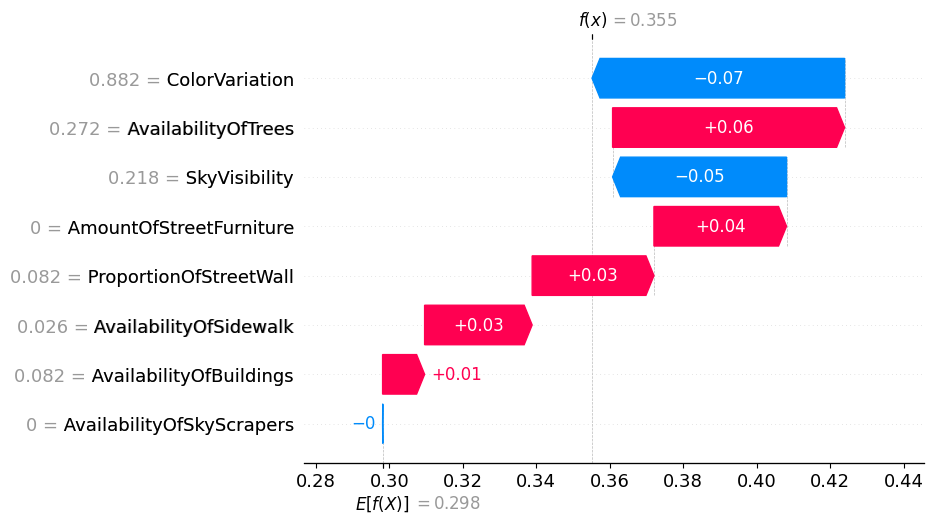

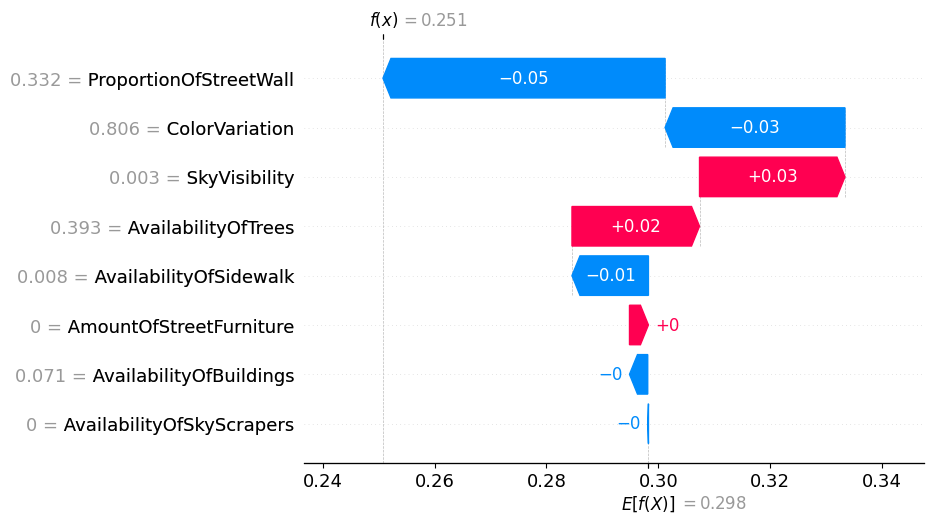

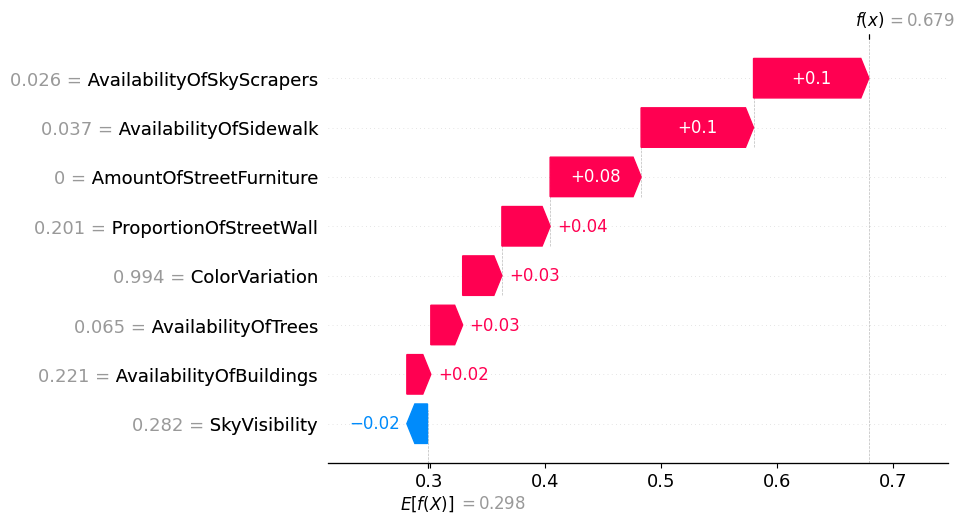

In [212]:
for c,predictions in enumerate(rf_best.predict_proba(modified_data_eval)):
  shap.plots.waterfall(shap_values[c,:,2],show=False)
  plt.savefig(str(c)+".png",dpi=150, bbox_inches='tight')
  plt.show()

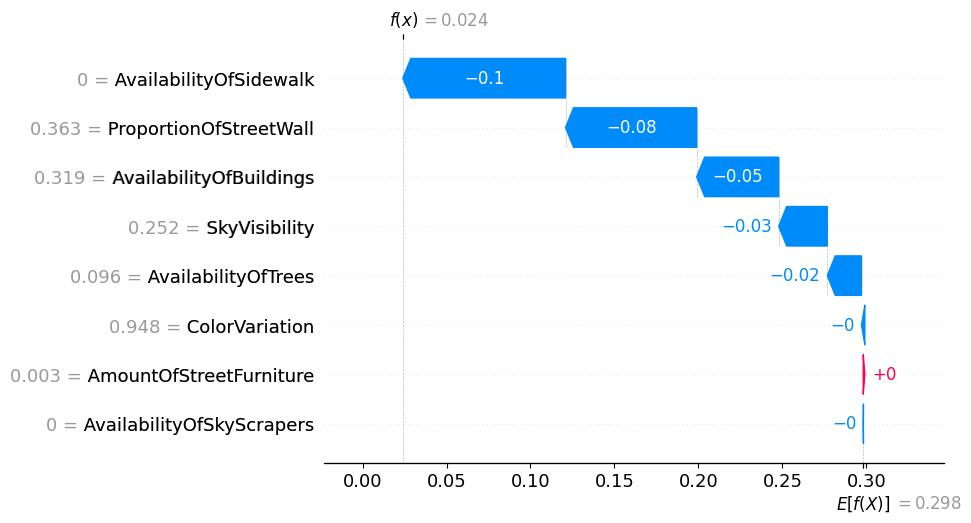

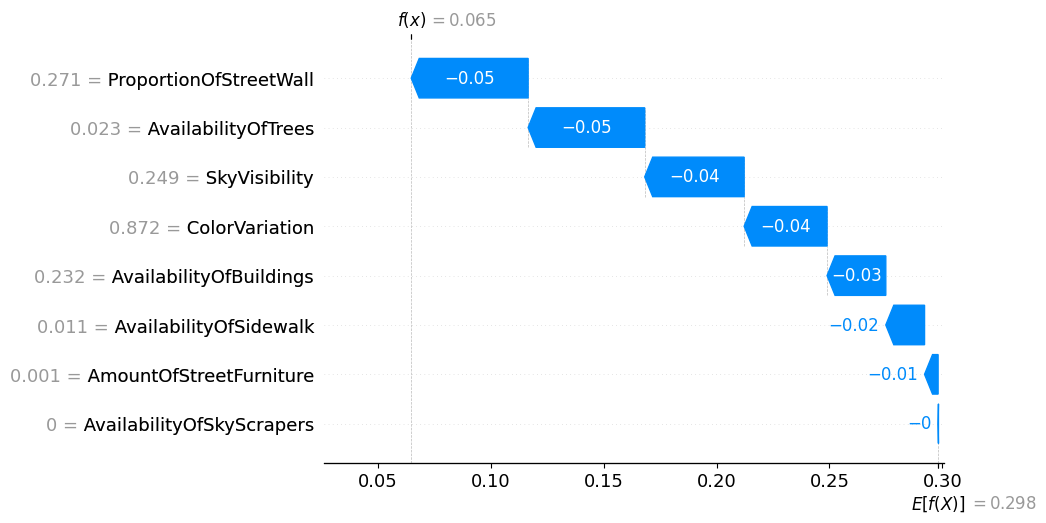

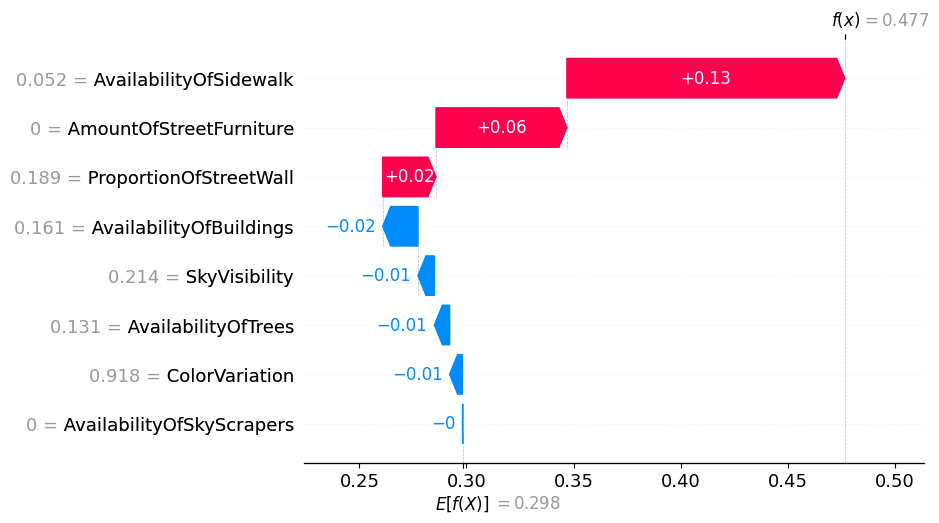

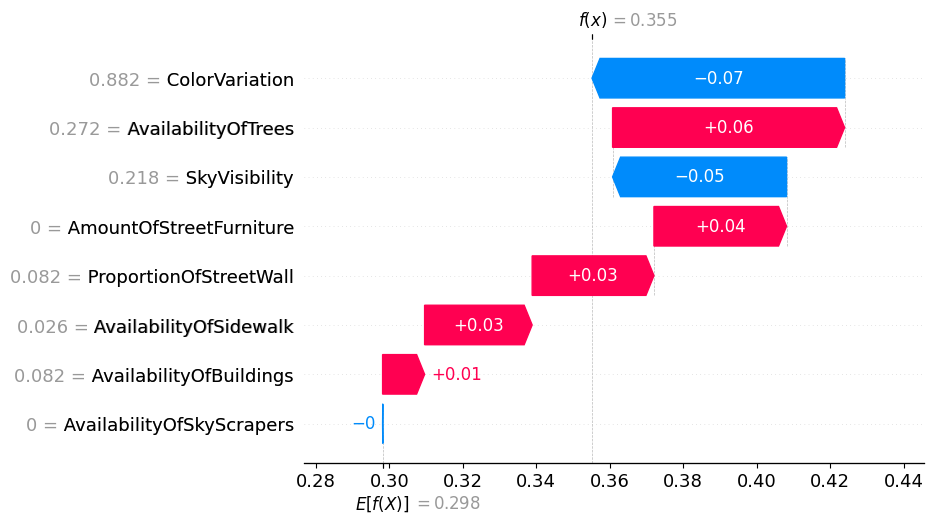

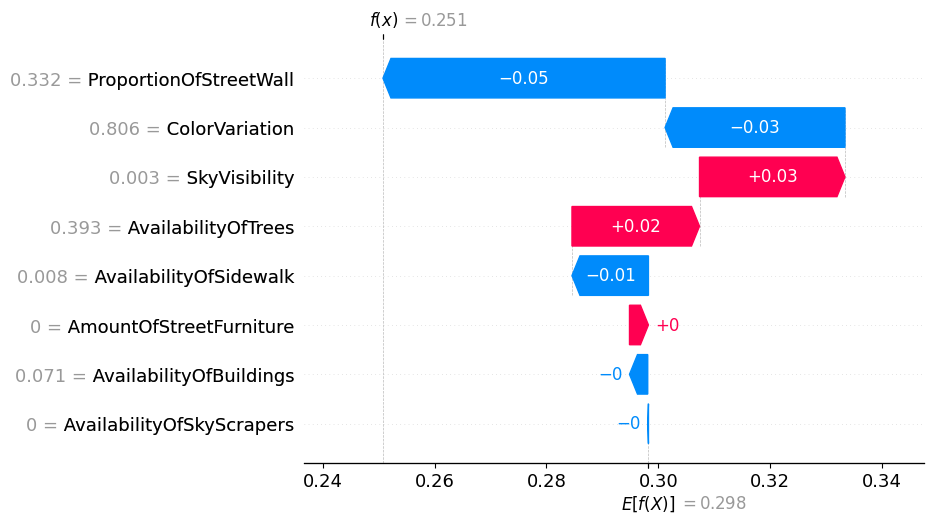

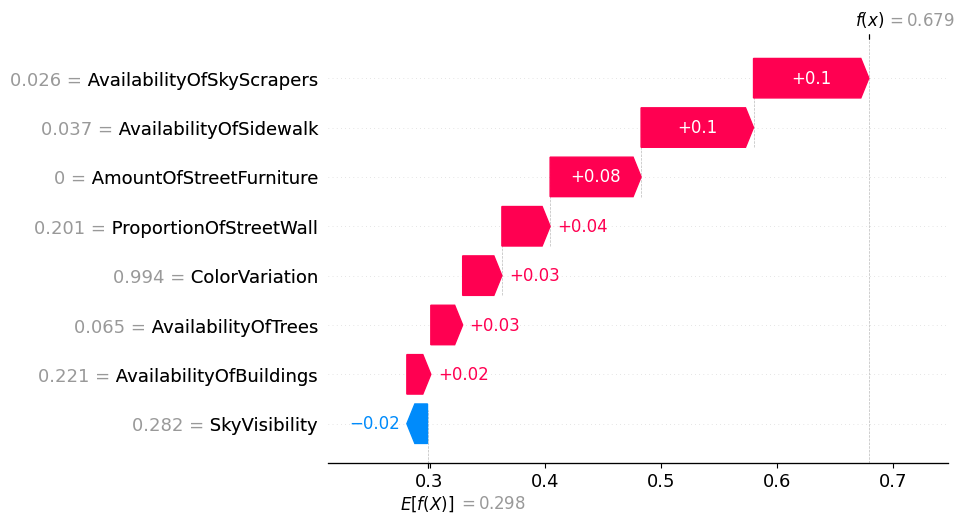

In [213]:
for c,predictions in enumerate(rf_best.predict_proba(modified_data_eval)):
  pred = np.argmax(rf_best.predict_proba(modified_data_eval)[5])
  shap.plots.waterfall(shap_values[c,:,pred],show=False)
  plt.savefig(str(c)+"_pred.png",dpi=150, bbox_inches='tight')
  plt.show()

In [214]:
test_images = X_test[80:]
shap_values = e.shap_values(test_images) #check_additivity=False
shap_values = e(test_images)

100%|===================| 562/564 [01:40<00:00]       

In [215]:
shap_values.shape

(188, 8, 3)

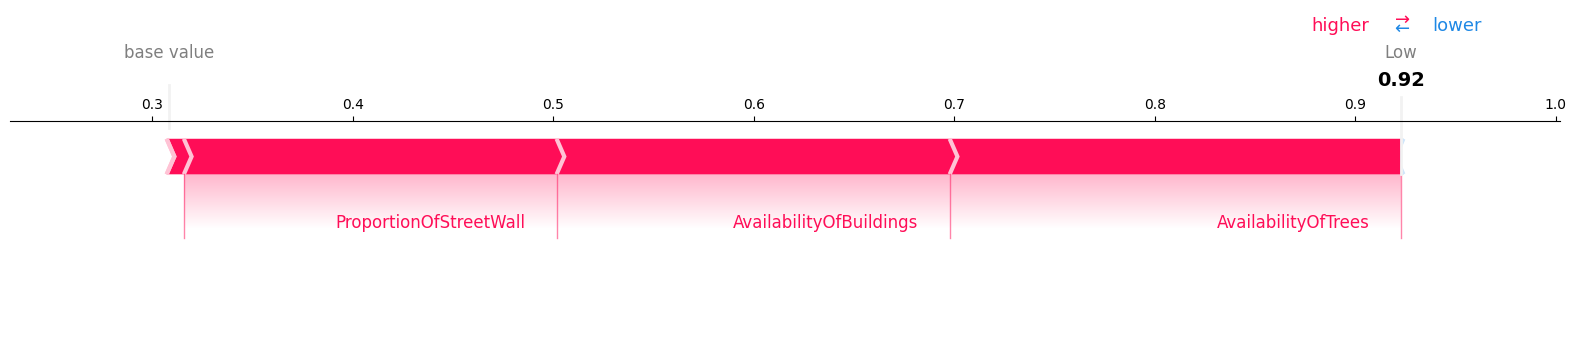

In [216]:
import matplotlib
shap.plots.force(e.expected_value[0], np.swapaxes(shap_values.values[0],0, 1)[0][:-1],feature_names=modified_data.columns[:-1],out_names=['Low'],matplotlib=matplotlib)

In [217]:
#shap_values

In [218]:
#shap.summary_plot(shap_values, test_images)

In [219]:
modified_data.columns

Index(['SkyVisibility', 'AvailabilityOfTrees', 'ProportionOfStreetWall',
       'AvailabilityOfBuildings', 'AmountOfStreetFurniture',
       'AvailabilityOfSidewalk', 'AvailabilityOfSkyScrapers',
       'ColorVariation'],
      dtype='object')

In [220]:
from sklearn.inspection import PartialDependenceDisplay


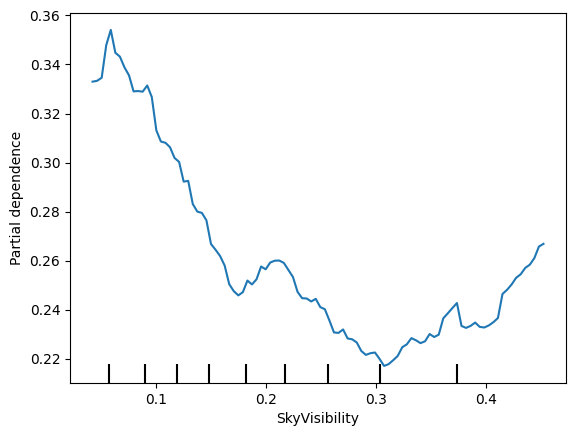

In [221]:
disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[0],target=2)
plt.savefig(str(0)+"pdp.png",dpi=150, bbox_inches='tight')
plt.show()

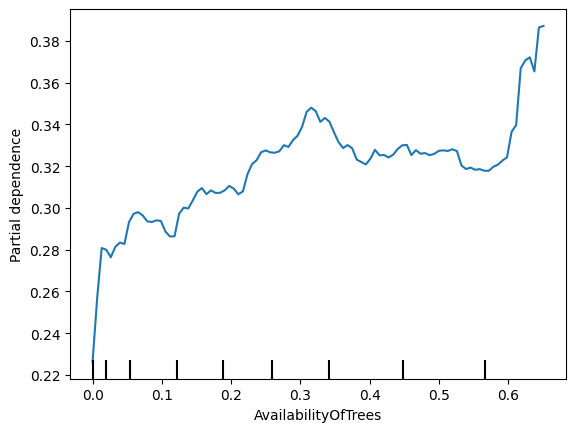

In [222]:
disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[1],target=2)
plt.savefig(str(1)+"pdp.png",dpi=150, bbox_inches='tight')
plt.show()

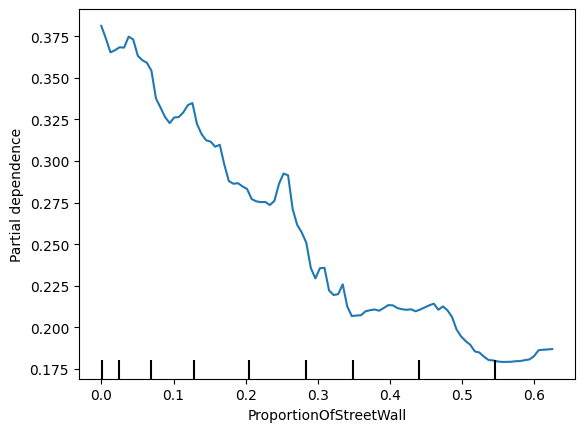

In [223]:
disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[2],target=2)
plt.savefig(str(2)+"pdp.png",dpi=150, bbox_inches='tight')
plt.show()

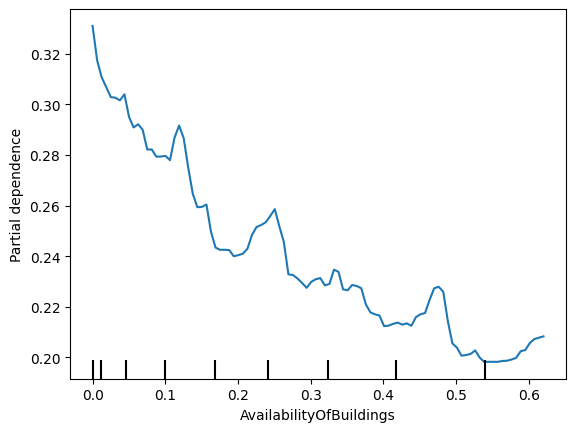

In [224]:
disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[3],target=2)
plt.savefig(str(3)+"pdp.png",dpi=150, bbox_inches='tight')
plt.show()

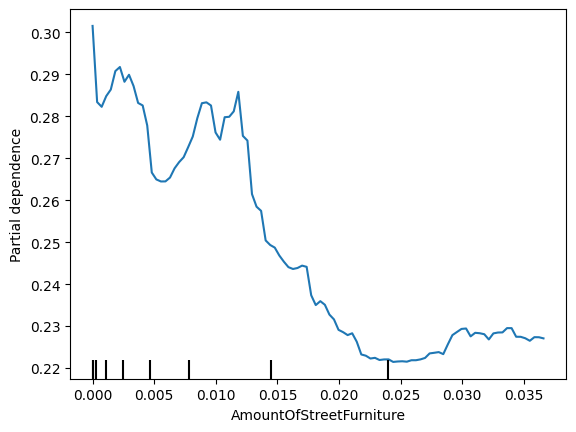

In [225]:
disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[4],target=2)
plt.savefig(str(4)+"pdp.png",dpi=150, bbox_inches='tight')
plt.show()

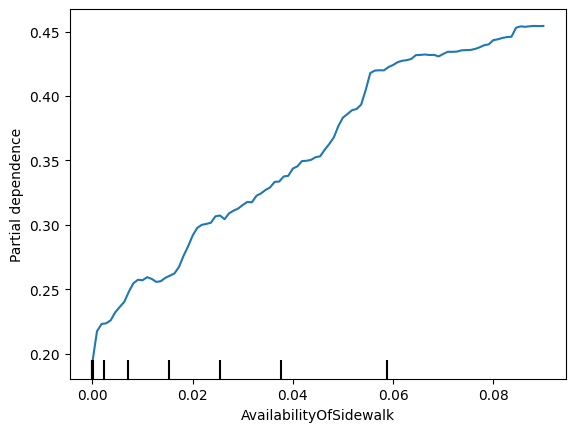

In [226]:
disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[5],target=2)
plt.savefig(str(5)+"pdp.png",dpi=150, bbox_inches='tight')
plt.show()

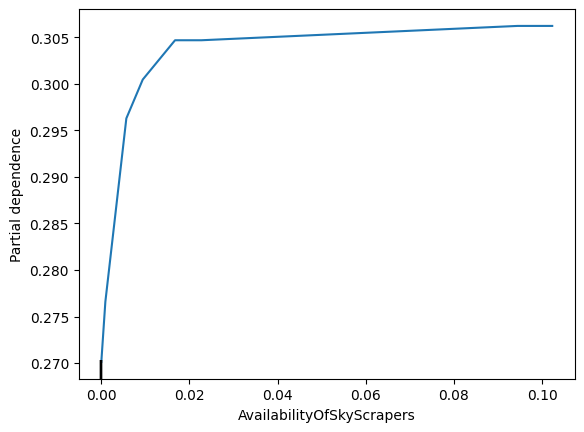

In [227]:
disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[6],target=2)
plt.savefig(str(6)+"pdp.png",dpi=150, bbox_inches='tight')
plt.show()

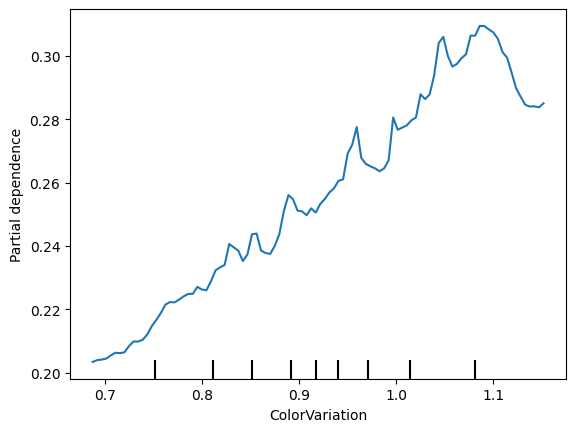

In [228]:
disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[7],target=2)
plt.savefig(str(7)+"pdp.png",dpi=150, bbox_inches='tight')
plt.show()

In [230]:
# disp1 = PartialDependenceDisplay.from_estimator(rf_best, X_train,[8],target=2)
# plt.savefig(str(8)+"pdp.png",dpi=150, bbox_inches='tight')
# plt.show()

In [231]:
shap_values[0].shape

(8, 3)

In [232]:
#np.swapaxes(shap_values.values[0],0, 1)[0]
#e.expected_value

In [233]:
y_test[40:]

,target
832,1
207,0
459,1
683,1
1325,2
...,...
1304,2
626,1
1293,2
436,0


In [234]:
rf_best.predict(X_test[40:])

array([2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1,
       1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0,
       1, 1, 2, 2, 2, 2, 0, 2])

In [235]:
rf_best.predict_proba(X_test[40:])

array([[9.35719888e-02, 4.23776284e-01, 4.82651727e-01],
       [4.65529277e-01, 3.58978748e-01, 1.75491975e-01],
       [1.42105263e-02, 5.91363457e-01, 3.94426016e-01],
       [1.02340824e-02, 9.01754831e-01, 8.80110862e-02],
       [1.86310390e-01, 1.30700866e-01, 6.82988745e-01],
       [1.63499784e-02, 8.93187119e-01, 9.04629027e-02],
       [7.21057171e-01, 7.89186047e-02, 2.00024225e-01],
       [8.28000000e-01, 9.80000000e-02, 7.40000000e-02],
       [1.01562776e-02, 5.20964054e-01, 4.68879668e-01],
       [0.00000000e+00, 9.46428126e-01, 5.35718745e-02],
       [3.32787179e-01, 2.27997436e-01, 4.39215385e-01],
       [6.80625000e-02, 4.91175595e-01, 4.40761905e-01],
       [1.24993474e-03, 6.50264870e-01, 3.48485195e-01],
       [9.96000000e-01, 4.00000000e-03, 0.00000000e+00],
       [3.55142526e-01, 2.01151931e-01, 4.43705543e-01],
       [7.63866667e-01, 6.41333333e-02, 1.72000000e-01],
       [5.62747778e-01, 2.66435296e-01, 1.70816926e-01],
       [8.87524415e-01, 6.70608

In [236]:
e.expected_value

array([0.30846449, 0.39330777, 0.29822774])

In [237]:
#shap_values.values[0].shape

In [238]:
np.swapaxes(shap_values.values[0],0, 1).shape

(3, 8)

In [239]:
data.columns[:-1]

Index(['index', 'wall', 'building;edifice', 'sky', 'floor;flooring', 'tree',
       'ceiling', 'road;route', 'bed', 'windowpane;window',
       ...
       'shower', 'radiator', 'glass;drinking;glass', 'clock', 'flag', 'R', 'G',
       'B', 'C', 'M'],
      dtype='object', length=156)

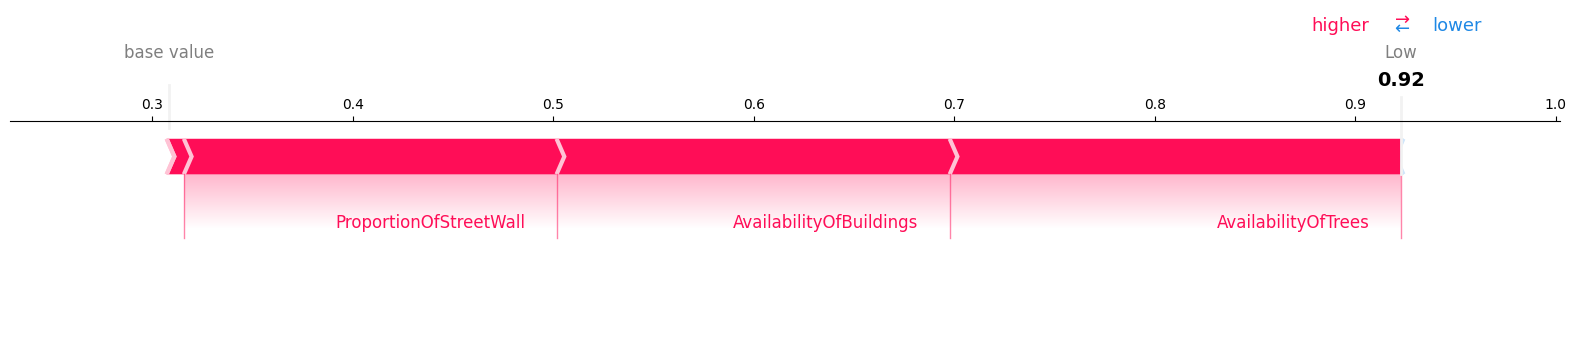

In [240]:
import matplotlib
shap.plots.force(e.expected_value[0], np.swapaxes(shap_values.values[0],0, 1)[0][:-1],feature_names=modified_data.columns[:-1],out_names=['Low'],matplotlib=matplotlib)

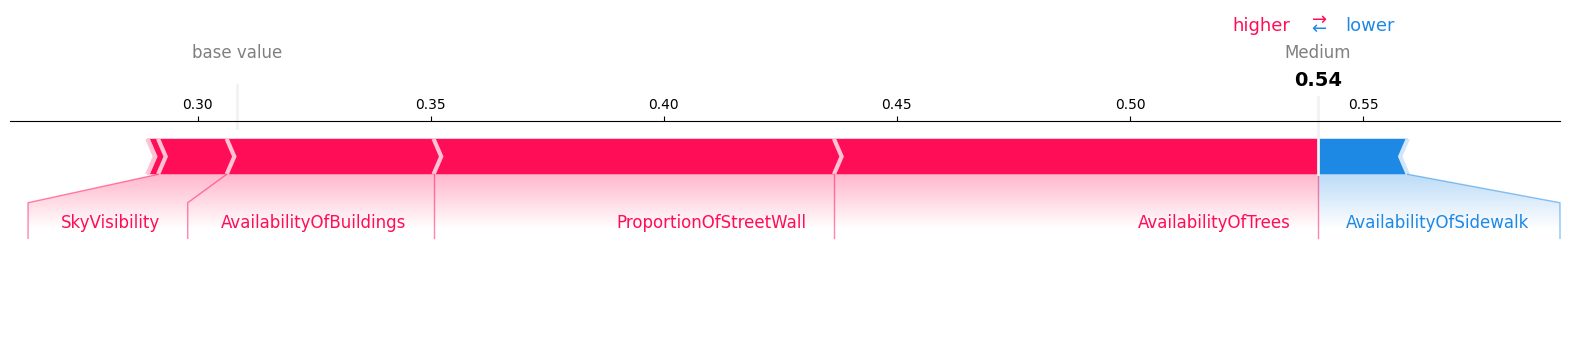

In [241]:
import matplotlib
shap.plots.force(e.expected_value[0], np.swapaxes(shap_values.values[1],0, 1)[1][:-1],feature_names=modified_data.columns[:-1],out_names=['Medium'],matplotlib=matplotlib)

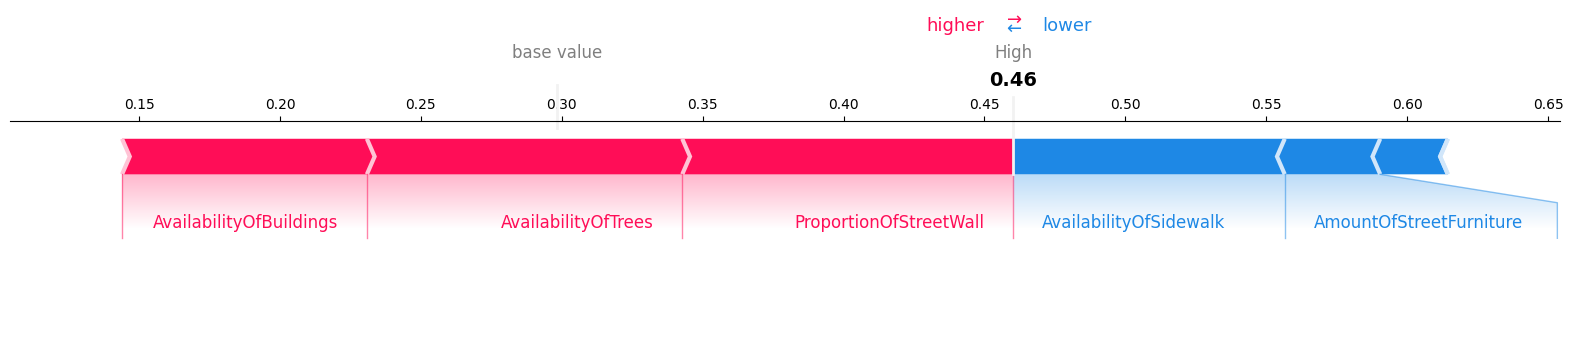

In [242]:
import matplotlib
shap.plots.force(e.expected_value[2], np.swapaxes(shap_values.values[2],0, 1)[2][:-1],feature_names=modified_data.columns[:-1],out_names=['High'],matplotlib=matplotlib)

In [243]:
shap_values.shape

(188, 8, 3)

In [244]:
#get shap values

In [245]:
shap_values = e.shap_values(X_train)

100%|===================| 3201/3207 [06:38<00:00]       

In [246]:
shap_values_ex = e(test_images)

 99%|===================| 557/564 [01:10<00:00]       

In [247]:
test_images.shape

(188, 8)

In [250]:
shap_values[0].shape

(1069, 8)

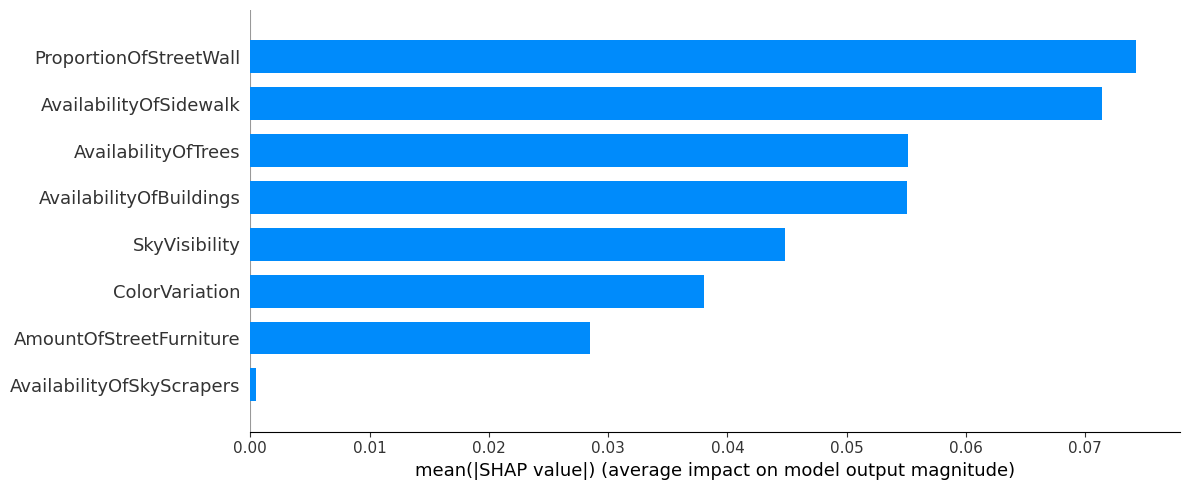

In [258]:
shap.summary_plot(shap_values[2],X_train,plot_type='bar', feature_names=modified_data_eval.columns, plot_size=(12, 5))#, X_test)
plt.savefig("shap_summary.png",dpi=700) #.png,.pdf will also support here

In [253]:
# end testing

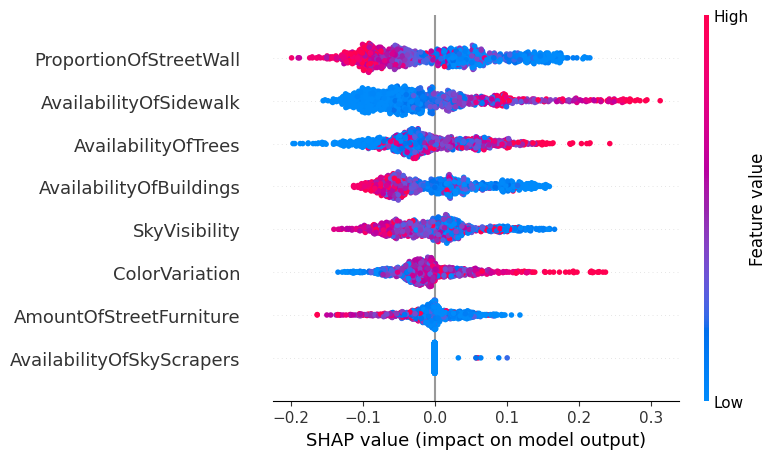

In [254]:
shap.summary_plot(shap_values[2], X_train)

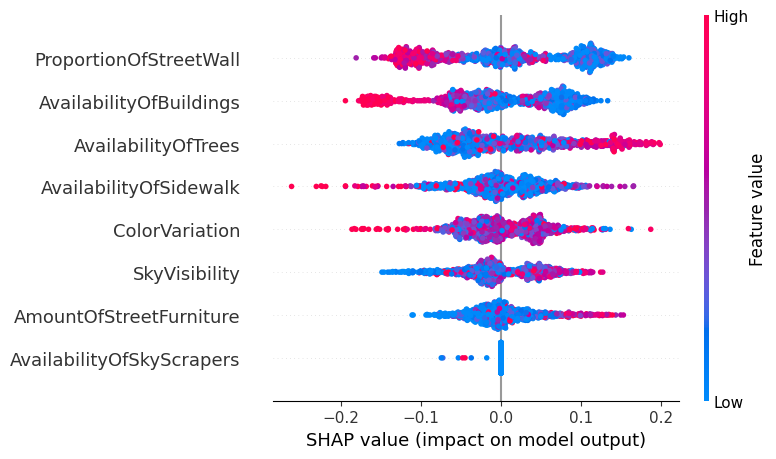

In [255]:
shap.summary_plot(shap_values[1], X_train)

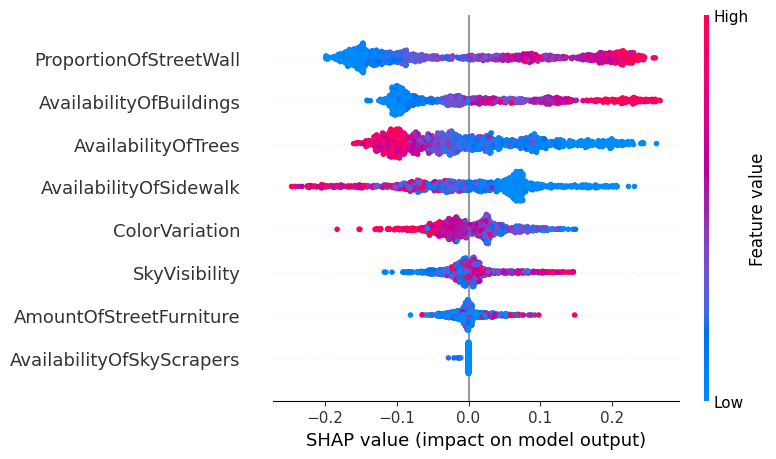

In [256]:
shap.summary_plot(shap_values[0], X_train)

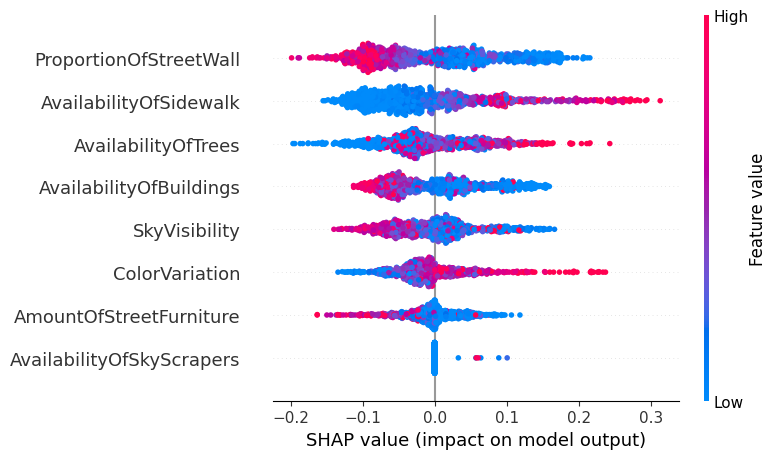

In [257]:

shap.summary_plot(shap_values[2], X_train)